In [1]:
#Step 1: Install Required Libraries
#pip install pandas 
#pip install nltk 
#pip install scikit-learn 
#pip install matplotlib 
#pip install seaborn

In [4]:
#Step 2: Load  the Dataset
import pandas as pd # type: ignore

# Load FIFA dataset
file_path = "C:/Users/dhruv/Downloads/data analysis projects/Completed/fifa/players_20.csv"  # Update path as needed
fifa_data = pd.read_csv(file_path)

# Display dataset shape and columns
print(f"Dataset Shape: {fifa_data.shape}")
print(fifa_data.columns)

Dataset Shape: (18278, 104)
Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)


In [5]:
#Step 3: Create a Sentiment Column
# Define sentiment labels based on the overall rating
def assign_sentiment(overall):
    if overall >= 80:
        return 1  # Positive Sentiment
    elif overall >= 70:
        return 0  # Neutral Sentiment
    else:
        return -1  # Negative Sentiment

# Apply sentiment classification
fifa_data['sentiment'] = fifa_data['overall'].apply(assign_sentiment)

# Display sentiment distribution
print(fifa_data['sentiment'].value_counts())

sentiment
-1    12620
 0     5090
 1      568
Name: count, dtype: int64


In [6]:
#Step 4: Feature Selection
# Select features and target
X = fifa_data[['age', 'overall', 'potential']]
y = fifa_data['sentiment']

# Check dataset size
print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")

Features Shape: (18278, 3)
Target Shape: (18278,)


In [7]:
#Step 5: Train-Test Split
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Size: {X_train.shape}, Testing Size: {X_test.shape}")

Training Size: (14622, 3), Testing Size: (3656, 3)


In [10]:
#Step 6: Train a Classification Model
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with scaled data
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [11]:
#Step 7: Evaluate Model Performance
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      2546
           0       0.00      0.00      0.00       995
           1       0.03      1.00      0.06       115

    accuracy                           0.03      3656
   macro avg       0.01      0.33      0.02      3656
weighted avg       0.00      0.03      0.00      3656

Accuracy Score: 0.03145514223194748


C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metri

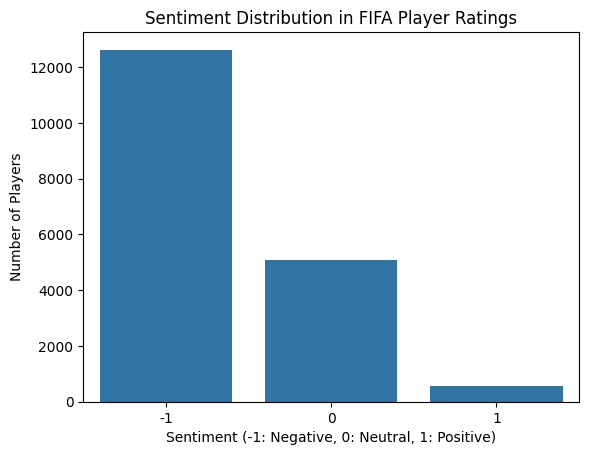

In [12]:
#Step 8: Visualize Sentiment Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
sns.countplot(x=fifa_data['sentiment'])
plt.title("Sentiment Distribution in FIFA Player Ratings")
plt.xlabel("Sentiment (-1: Negative, 0: Neutral, 1: Positive)")
plt.ylabel("Number of Players")
plt.show()